# Final Visualization Report: Global Video Game Sales (1980-2020)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
#data cleaning
#droping missing rows
data.dropna(inplace=True)
#removing duplicates
data.drop_duplicates(inplace=True)

In [4]:
#summary table
summary_table = data.groupby('Genre').agg(
    Total_Global_Sales=('Global_Sales', 'sum'),
    Average_Global_Sales=('Global_Sales', 'mean'),
    Count_of_Games=('Global_Sales', 'count')
).sort_values(by='Total_Global_Sales', ascending=False).reset_index()
summary_table

,Genre,Total_Global_Sales,Average_Global_Sales,Count_of_Games
0,Action,1722.84,0.529942,3251
1,Sports,1309.24,0.568247,2304
2,Shooter,1026.20,0.800468,1282
3,Role-Playing,923.83,0.628456,1470
4,Platform,829.13,0.947577,875
5,Misc,789.87,0.468488,1686
6,Racing,726.76,0.593273,1225
7,Fighting,444.05,0.531160,836
8,Simulation,389.98,0.459882,848
9,Puzzle,242.21,0.424930,570


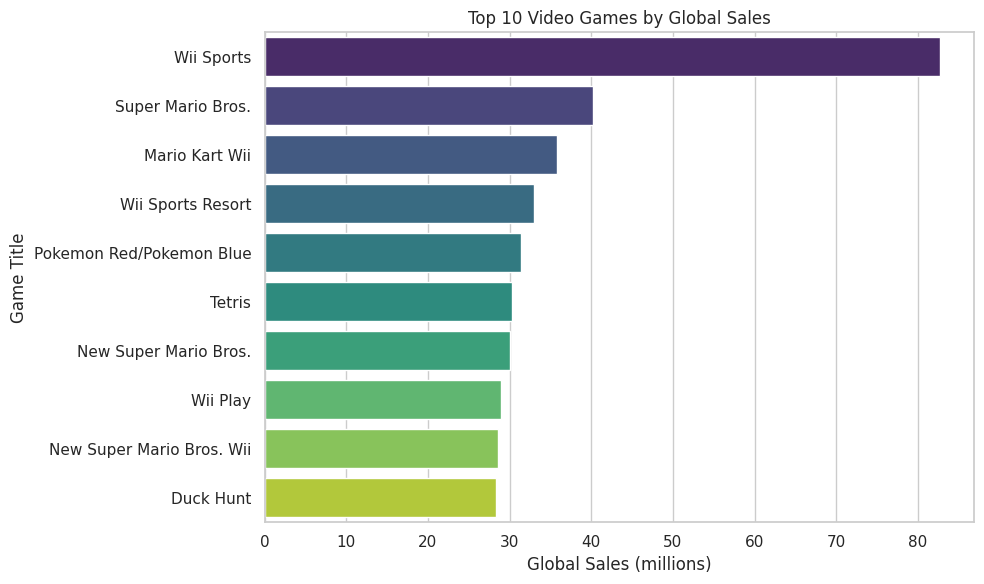

In [5]:
#plots
sns.set_theme(style="whitegrid")
#top games by Global_sales
top_10_games = data.sort_values(by='Global_Sales', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_10_games, hue='Name', dodge=False, palette='viridis')
plt.title('Top 10 Video Games by Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()

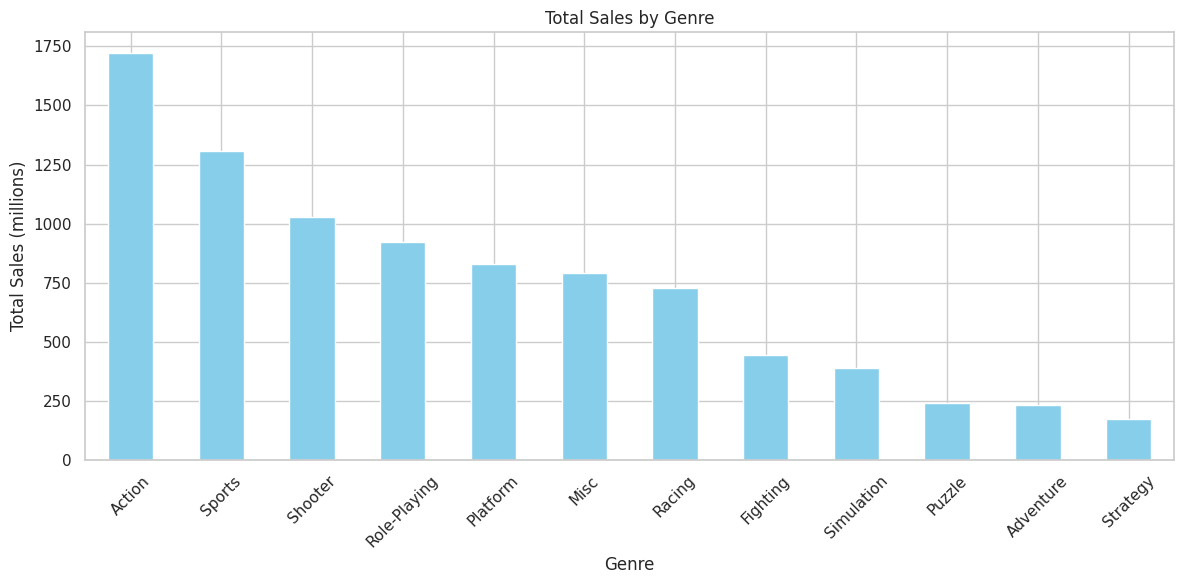

In [6]:
#total sales by Genre
genre_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

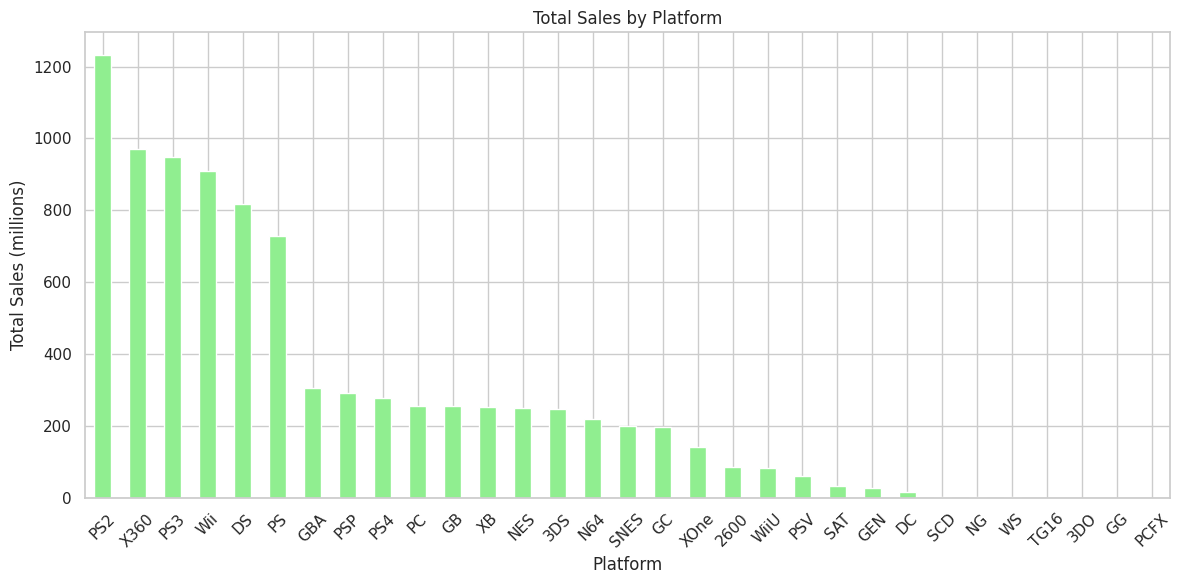

In [7]:
#sales by Platform
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

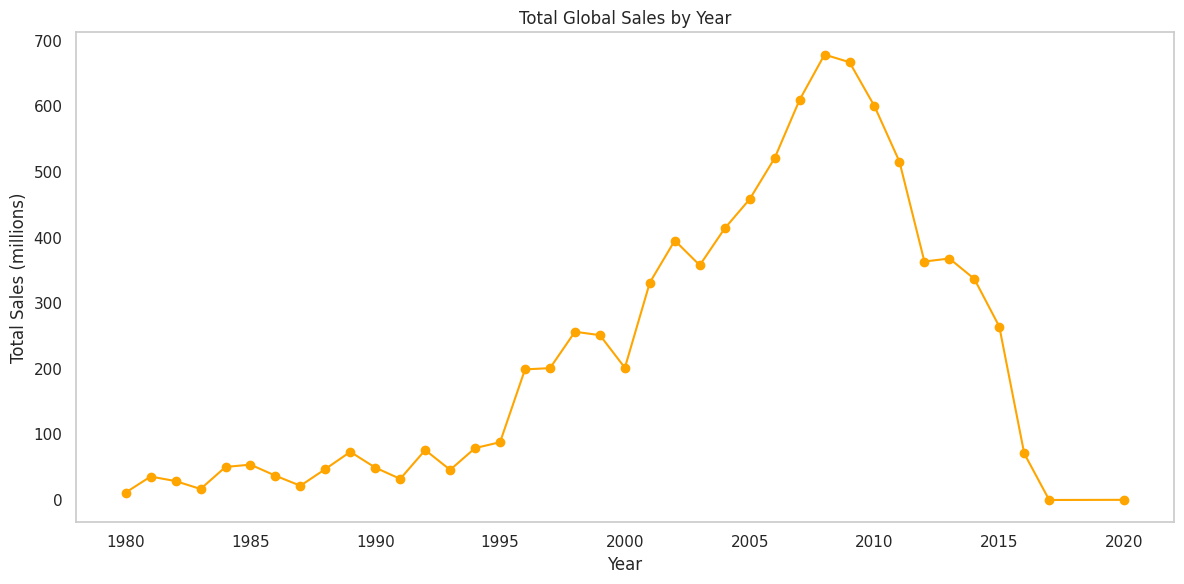

In [8]:
#sales by Year
year_sales = data.groupby('Year')['Global_Sales'].sum().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(year_sales.index, year_sales.values, marker='o', linestyle='-', color='orange')
plt.title('Total Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.grid(visible=False)
plt.tight_layout()
plt.show()